# Exercises

These exercises are a mix of Python and pandas/EDA practice. Most should be no more than a few lines of code! 

In [32]:
# here is a Python list:

a = [1, 2, 3, 4, 5, 6]

# get a list containing the last 3 elements of a
b = a[-3:]
# reverse the list
d = a.reverse()
# get a list where each entry in a is squared (so the new list is [1, 4, 9, 16, 25, 36])
squared = [i * 2 for i in a]

In [33]:
# create a numpy array from this list
import numpy as np
b = np.array(a)
b

array([6, 5, 4, 3, 2, 1])

In [34]:
# find the mean of b
np.mean(b)

3.5

In [35]:
# get a list where each entry in b is squared (so the new numpy array is [1, 4, 9, 16, 25, 36])
# use a different (numpy-specific) approach
np.square(b)

array([36, 25, 16,  9,  4,  1])

In [36]:
# change b from a length-6 list to a 2x3 matrix
b = b.reshape(2,3)
b

array([[6, 5, 4],
       [3, 2, 1]])

In [37]:
# find the mean value of each row
np.mean(b, axis = 1)


array([5., 2.])

In [38]:
# find the mean value of each column
np.mean(b,axis = 0)

array([4.5, 3.5, 2.5])

In [39]:
# find the third column of b
b[ : 2] #HOW

array([[6, 5, 4],
       [3, 2, 1]])

In [1]:
# load in the "starbucks_clean.csv" dataset
import pandas as pd
import numpy as np
df = pd.read_csv('../data/starbucks_clean.csv') 
display(df)

,Unnamed: 0,beverage_category,beverage,beverage_prep,calories,total fat (g),trans fat (g),saturated fat (g),sodium (mg),total carbohydrates (g),cholesterol (mg),dietary fibre (g),sugars (g),protein (g),vitamin a (% dv),vitamin c (% dv),calcium (% dv),iron (% dv),caffeine (mg)
0,0,Coffee,Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,NaN,175
1,1,Coffee,Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,NaN,260
2,2,Coffee,Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,NaN,330
3,3,Coffee,Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,NaN,410
4,4,Classic Espresso Drinks,Classic Espresso Drinks,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10,0,20,NaN,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,237,Frappuccino® Blended Crème,Frappuccino® Blended Crème,Soymilk,320,3.2,0.4,0.0,0,250,67,1,64,5.0,6,8,20,10.0,0
238,238,Frappuccino® Blended Crème,Frappuccino® Blended Crème,Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6,0,10,NaN,0
239,239,Frappuccino® Blended Crème,Frappuccino® Blended Crème,Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6,0,10,NaN,0
240,240,Frappuccino® Blended Crème,Frappuccino® Blended Crème,Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4,0,10,6.0,0


In [4]:
# this is nutritional info for starbucks items
# let's see if we can answer some questions

# what is the average # calories across all items?
df["calories"].mean()

193.87190082644628

In [5]:
# how many different categories of beverages are there?
df["beverage_category"].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [7]:
# what is the average # calories for each beverage category?
bev = df.groupby("beverage_category")
bev["calories"].mean()

beverage_category
Classic Espresso Drinks              140.172414
Coffee                                 4.250000
Frappuccino® Blended Coffee          276.944444
Frappuccino® Blended Crème           233.076923
Frappuccino® Light Blended Coffee    162.500000
Shaken Iced Beverages                114.444444
Signature Espresso Drinks            250.000000
Smoothies                            282.222222
Tazo® Tea Drinks                     177.307692
Name: calories, dtype: float64

In [8]:
# what beverage preparation includes the most sugar on average?
bevprep = df.groupby("beverage_prep")
bevprep["sugars (g)"].mean().idxmax()


'Whole Milk'

In [11]:
# what is the average % daily value calcium content for each beverage?
beverage = df.groupby("beverage_category")
beverage["calcium (% dv)"].mean()

beverage_category
Classic Espresso Drinks              27.344828
Coffee                                0.500000
Frappuccino® Blended Coffee          12.277778
Frappuccino® Blended Crème           13.846154
Frappuccino® Light Blended Coffee    11.333333
Shaken Iced Beverages                 4.000000
Signature Espresso Drinks            31.375000
Smoothies                            13.333333
Tazo® Tea Drinks                     23.653846
Name: calcium (% dv), dtype: float64

In [14]:
# It's bulking season. What drink should Naitian get so that he maximizes protein but minimizes calories?
# (you can use more than one line for this one)
# there are multiple valid approaches you can take for this (with different answers)
# I know that you want more calories for bulking season but whatever this is MDST, not Michigan Muscle Club okay
df[df["protein (g)"]/ df["calories"]] == (df["protein(g)"]/df["calories"]).max()

KeyError: "None of [Float64Index([ 0.09999999999999999,                0.125,                  0.2,\n                               0.2,  0.08571428571428572,                 0.06,\n               0.07142857142857142,                  0.1,  0.06666666666666667,\n               0.07272727272727272,\n              ...\n              0.017391304347826087, 0.015384615384615385,               0.0125,\n               0.01935483870967742, 0.017142857142857144,             0.015625,\n              0.023529411764705882,                0.015, 0.016666666666666666,\n              0.020833333333333332],\n             dtype='float64', length=242)] are in the [columns]"

<AxesSubplot:ylabel='Frequency'>

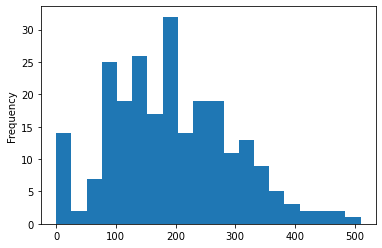

In [15]:
# plot the distribution of the number of calories in drinks using matplotlib
df["calories"].plot.hist(bins = 20)

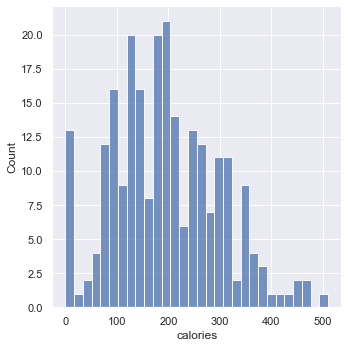

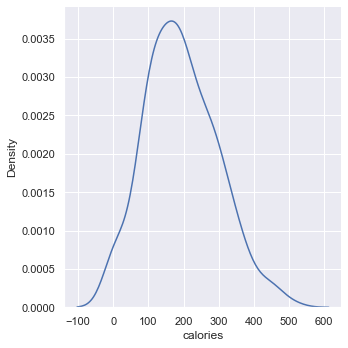

In [18]:
# plot the same distribution using seaborn. what about a density plot instead?
import seaborn as sns
sns.set()
sns.displot(data=df, x="calories", bins=30)
sns.displot(data=df, x="calories", kind="kde")

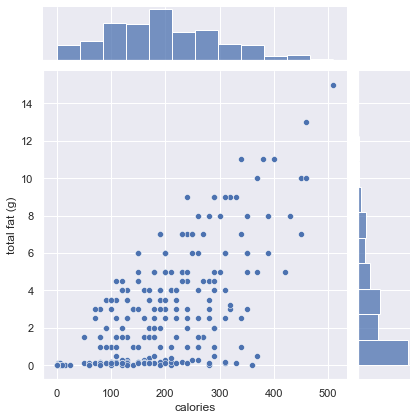

In [19]:
# plot calories against total fat using seaborn
sns.jointplot(data=df, x="calories", y="total fat (g)")

beverage_prep
2% Milk               AxesSubplot(0.125,0.125;0.775x0.755)
Doppio                AxesSubplot(0.125,0.125;0.775x0.755)
Grande                AxesSubplot(0.125,0.125;0.775x0.755)
Grande Nonfat Milk    AxesSubplot(0.125,0.125;0.775x0.755)
Short                 AxesSubplot(0.125,0.125;0.775x0.755)
Short Nonfat Milk     AxesSubplot(0.125,0.125;0.775x0.755)
Solo                  AxesSubplot(0.125,0.125;0.775x0.755)
Soymilk               AxesSubplot(0.125,0.125;0.775x0.755)
Tall                  AxesSubplot(0.125,0.125;0.775x0.755)
Tall Nonfat Milk      AxesSubplot(0.125,0.125;0.775x0.755)
Venti                 AxesSubplot(0.125,0.125;0.775x0.755)
Venti Nonfat Milk     AxesSubplot(0.125,0.125;0.775x0.755)
Whole Milk            AxesSubplot(0.125,0.125;0.775x0.755)
Name: calories, dtype: object

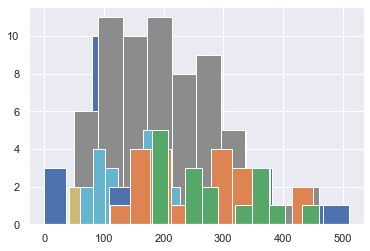

In [20]:
# plot the distribution of calories in Short, Tall, Grande, and Venti drinks
# (you can use multiple lines for this)
# twist: you should also include the Nonfat Milk drinks that also have an associated size.
df.groupby("beverage_prep")["calories"].hist()
# you can decide how you want to visualize this. Colors? Small multiples? Density vs histogram?
# the starbucks is your oyster.